In [72]:
# This Phython 3 environment comes with many helpful analytics libraries installed
# For Example, here's several helpful packages to load in

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # for data visualization

import warnings
warnings.filterwarnings("ignore") # ignore all the warnings and the code will still run smoothly as warning are less severe and the code won't stop executing

from pandas.plotting import parallel_coordinates

# Input data files are available in the directory itself and for colab user "/content/file_name"

import os
print(os.listdir("D:\Machine-Learning\Models"))

['2015.csv', '2016.csv', '2017.csv', '2018.csv', '2019.csv', 'graph.png', 'World_Happiness_Report_Data_Compilation.ipynb']


In [73]:
# Load data from the csv files
data_2015 = pd.read_csv("2015.csv")
data_2016 = pd.read_csv("2016.csv")
data_2017 = pd.read_csv("2017.csv")

# Column name change
data_2015.columns = [each.split()[0] if (len(each.split()) > 2) else each.replace(" ", "_") for each in data_2015.columns]
data_2016.columns = [each.split()[0] if (len(each.split()) > 2) else each.replace(" ", "_") for each in data_2016.columns]
data_2017.columns = [each.replace(".", " ") for each in data_2017.columns]
data_2017.columns = [each.split()[0] if (len(each.split()) > 2) else each.replace(" ", "_") for each in data_2017.columns]

In [74]:
data_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard_Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [75]:
# getting overview of our data
data_2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            158 non-null    object 
 1   Region             158 non-null    object 
 2   Happiness_Rank     158 non-null    int64  
 3   Happiness_Score    158 non-null    float64
 4   Standard_Error     158 non-null    float64
 5   Economy            158 non-null    float64
 6   Family             158 non-null    float64
 7   Health             158 non-null    float64
 8   Freedom            158 non-null    float64
 9   Trust              158 non-null    float64
 10  Generosity         158 non-null    float64
 11  Dystopia_Residual  158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


In [76]:
print("Are there any missing data? :", data_2015.isnull().any().any())
print(data_2015.isnull().sum())

Are there any missing data? : False
Country              0
Region               0
Happiness_Rank       0
Happiness_Score      0
Standard_Error       0
Economy              0
Family               0
Health               0
Freedom              0
Trust                0
Generosity           0
Dystopia_Residual    0
dtype: int64


In [77]:
data_2015["Happiness_Score"].value_counts()

5.192    2
7.587    1
4.686    1
4.839    1
4.800    1
        ..
5.855    1
5.848    1
5.833    1
5.828    1
2.839    1
Name: Happiness_Score, Length: 157, dtype: int64

In [78]:
# we found out how many hospitals in country in our data
print("\n\nRegion in Dataset: \n")
print("There are {} differnet values \n". format(len(data_2015.Region.unique())))
print(data_2015.Region.unique())



Region in Dataset: 

There are 10 differnet values 

['Western Europe' 'North America' 'Australia and New Zealand'
 'Middle East and Northern Africa' 'Latin America and Caribbean'
 'Southeastern Asia' 'Central and Eastern Europe' 'Eastern Asia'
 'Sub-Saharan Africa' 'Southern Asia']


In [79]:
region_lists = list(data_2015['Region'].unique())
region_happiness_ratio = []
for each in region_lists:
    region = data_2015[data_2015['Region'] == each]
    region_happiness_rate = sum(region.Happiness_Score)/len(region)
    region_happiness_ratio.append(region_happiness_rate)

data = pd.DataFrame({'region': region_lists, 'region_happiness_ratio': region_happiness_ratio})
new_index = (data['region_happiness_ratio'].sort_values(ascending = False)).index.values
sorted_data = data.reindex(new_index)

sorted_data

,region,region_happiness_ratio
2,Australia and New Zealand,7.285000
1,North America,7.273000
0,Western Europe,6.689619
4,Latin America and Caribbean,6.144682
7,Eastern Asia,5.626167
3,Middle East and Northern Africa,5.406900
6,Central and Eastern Europe,5.332931
5,Southeastern Asia,5.317444
9,Southern Asia,4.580857
8,Sub-Saharan Africa,4.202800


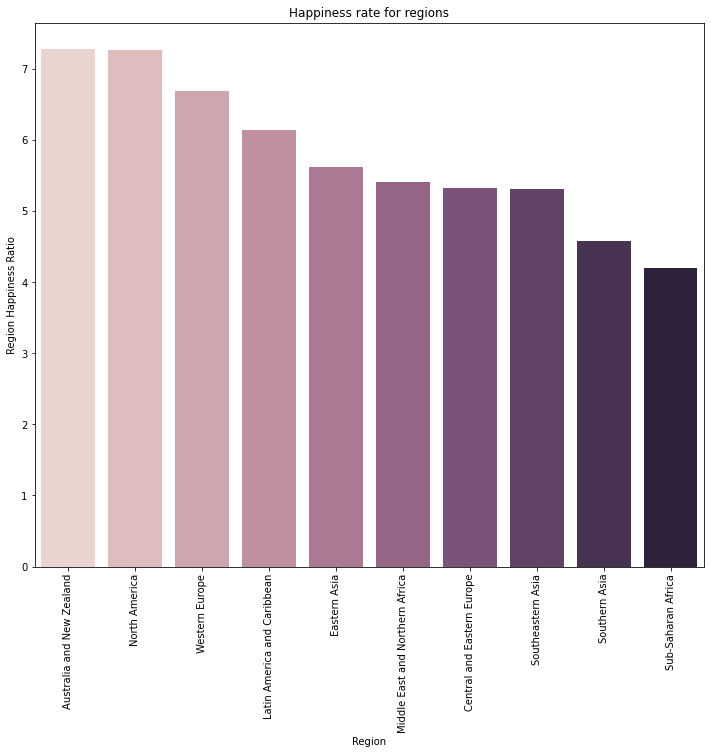

In [80]:
# Visualization
# Create a new figure and make the size (12, 10)
plt.figure(figsize=(12, 10))
sns.barplot(x = sorted_data['region'], y = sorted_data['region_happiness_ratio'], palette = sns.cubehelix_palette(len(sorted_data['region'])))

# Place the region names at a 90-degree angle.
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Region Happiness Ratio')
plt.title('Happiness rate for regions')
plt.show()

In [81]:
# meaningless data control
data_2015["Economy"].value_counts()

1.39651    1
0.39753    1
1.15406    1
1.02564    1
1.12094    1
          ..
1.12254    1
1.18498    1
1.14723    1
0.59325    1
0.20868    1
Name: Economy, Length: 158, dtype: int64

In [82]:
region_lists = list(data_2015['Region'].unique())
region_economy_ratio = []
for each in region_lists:
    region = data_2015[data_2015['Region'] == each]
    region_economy_rate = sum(region.Economy)/len(region)
    region_economy_ratio.append(region_economy_rate)

data_economy = pd.DataFrame({'region': region_lists, 'region_economy_ratio': region_economy_ratio})
new_index_economy = (data_economy['region_economy_ratio'].sort_values(ascending = True)).index.values
sorted_data_economy = data_economy.reindex(new_index_economy)
sorted_data_economy.head()

,region,region_economy_ratio
8,Sub-Saharan Africa,0.380473
9,Southern Asia,0.560486
5,Southeastern Asia,0.789054
4,Latin America and Caribbean,0.876815
6,Central and Eastern Europe,0.942438


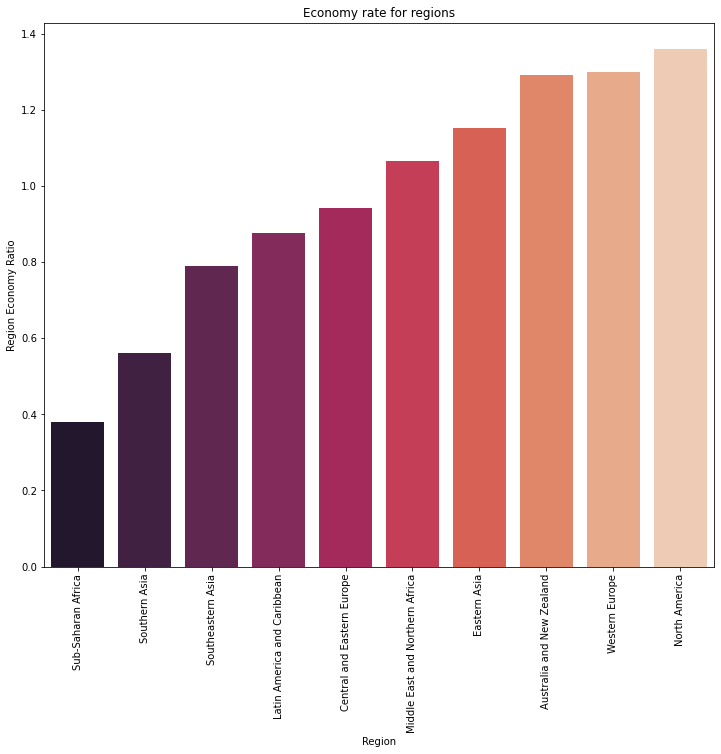

In [83]:
# Visualization
# Create a new figure and make the size (12, 10)
f, ax1 = plt.subplots(figsize = (12, 10))
sns.barplot(x = sorted_data_economy['region'], y = sorted_data_economy['region_economy_ratio'], palette = 'rocket', ax = ax1)

# Place the region names at a 90-degree angle.s
plt.xticks(rotation = 90)
plt.xlabel('Region')
plt.ylabel('Region Economy Ratio')
plt.title('Economy rate for regions')
plt.show()


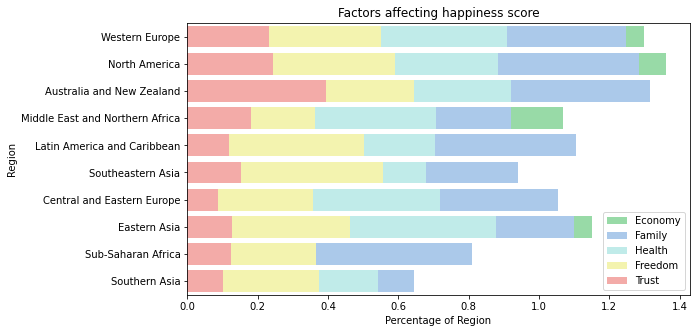

In [84]:
# Horizontal bar plot
region_lists = list(data_2015['Region'].unique())
share_economy = []
share_family = []
share_health = []
share_freedom = []
share_trust = []

for each in region_lists:
    region = data_2015[data_2015['Region'] == each]
    share_economy.append(sum(region.Economy)/len(region))
    share_family.append(sum(region.Family)/len(region))
    share_health.append(sum(region.Health)/len(region))
    share_freedom.append(sum(region.Freedom)/len(region))
    share_trust.append(sum(region.Trust) / len(region))

# Visualization
f, ax = plt.subplots(figsize = (9, 5))
sns.set_color_codes("pastel")
sns.barplot(x = share_economy, y = region_lists, color = 'g', label = "Economy")
sns.barplot(x=share_family,y=region_lists,color='b',label="Family")
sns.barplot(x=share_health,y=region_lists,color='c',label="Health")
sns.barplot(x=share_freedom,y=region_lists,color='y',label="Freedom")
sns.barplot(x=share_trust,y=region_lists,color='r',label="Trust")
ax.legend(loc="lower right",frameon = True)
ax.set(xlabel='Percentage of Region', ylabel='Region',title = "Factors affecting happiness score")
plt.show()

### Point Plot

* The rate of happiness score and the rate of economy affecting happiness score

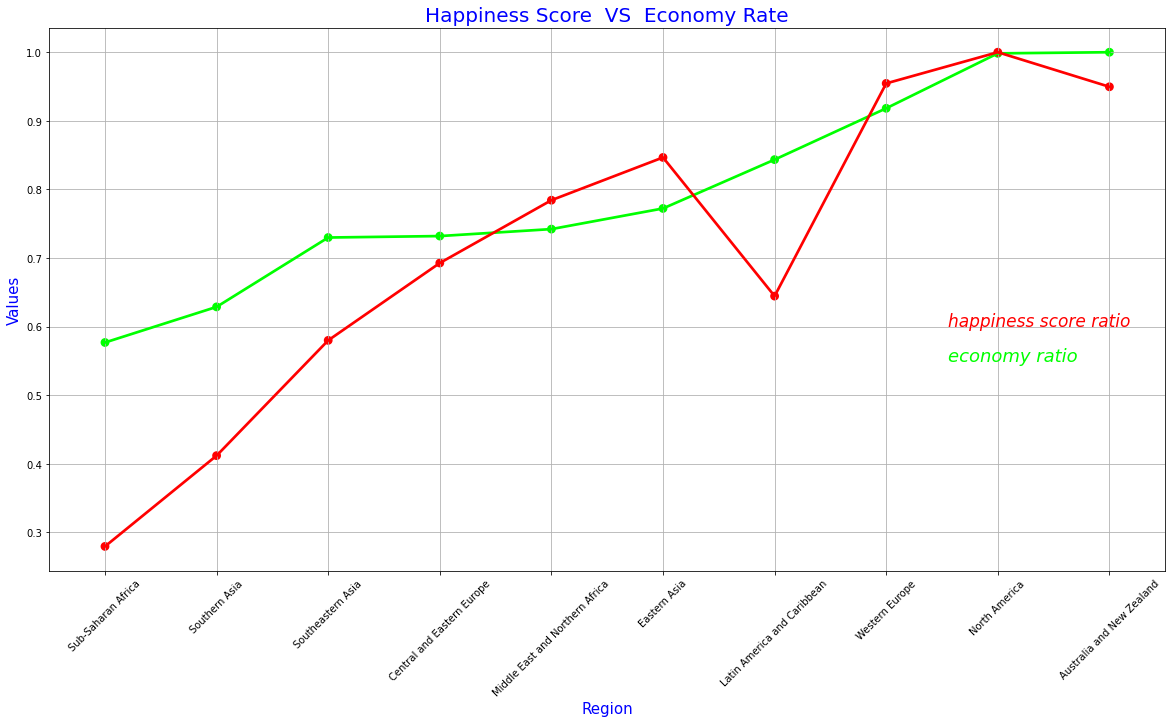

In [85]:
sorted_data['region_happiness_ratio']=sorted_data['region_happiness_ratio']/max(sorted_data['region_happiness_ratio'])
sorted_data_economy['region_economy_ratio']=sorted_data_economy['region_economy_ratio']/max(sorted_data_economy['region_economy_ratio'])

data=pd.concat([sorted_data,sorted_data_economy['region_economy_ratio']],axis=1)
data.sort_values('region_happiness_ratio',inplace=True)

#Visualization
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='region',y='region_happiness_ratio',data=data,color='lime',alpha=0.8)
sns.pointplot(x='region',y='region_economy_ratio',data=data,color='red',alpha=0.8)
plt.text(7.55,0.6,'happiness score ratio',color='red',fontsize = 17,style = 'italic')
plt.text(7.55,0.55,'economy ratio',color='lime',fontsize = 18,style = 'italic')
plt.xticks(rotation=45)
plt.xlabel('Region',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('Happiness Score  VS  Economy Rate',fontsize = 20,color='blue')
plt.grid()
plt.show()

### Joint Plot

* Visualization of the percentage of happiness according to regions and the rate of family affecting it.
* With the joint plot we can see the correlation between the two features.

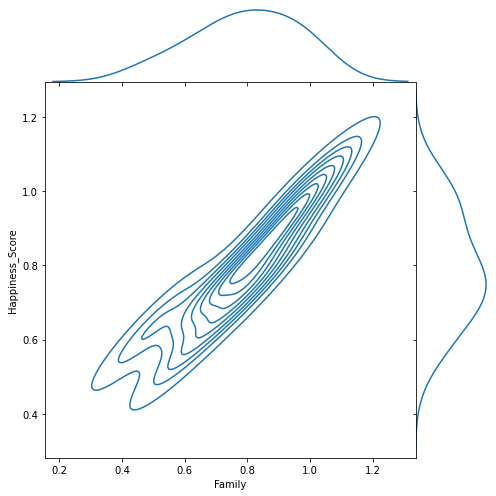

In [86]:
dataframe = pd.pivot_table(data_2015, index = 'Region', values = ["Happiness_Score", "Family"])

# to normalize
dataframe["Happiness_Score"] = dataframe["Happiness_Score"]/max(dataframe["Happiness_Score"])
dataframe["Family"] = dataframe["Family"]/max(dataframe["Family"])
sns.jointplot(dataframe.Family, dataframe.Happiness_Score, kind = "kde", height = 7, space = 0)
plt.savefig('graph.png')
plt.show()

* We find that there is a positive correlation between family and happiness score.

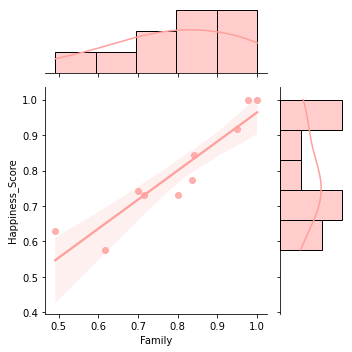

In [87]:
# Linear regression with marginal distributions
g = sns.jointplot("Family", "Happiness_Score", data = dataframe, height = 5, kind = "reg", ratio = 3, color = "r")

### Pie Chart

* According to the year we can visually see the percentage of shappiness score.

In [88]:
# broadcasting
data_2015['Year'] = 2015
data_2016["Year"] = 2016
data_2017["Year"] = 2017

# concating
data_concat = pd.concat([data_2015, data_2016, data_2017], axis = 0, sort = False)

df = pd.pivot_table(data_concat, index = "Year", values = "Happiness_Score")
df

,Happiness_Score
Year,
2015,5.375734
2016,5.382185
2017,5.354019


* The values displayed in the Happiness Score column are the annual average for all countries.

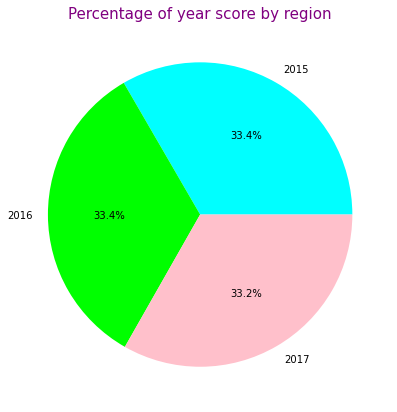

In [89]:
# Pie Chart
df.dropna(inplace = True)
labels = df.index
colors = ['cyan', 'lime', 'pink']
explode = [0, 0, 0]
sizes = df.values
sizes = sizes.ravel()


# Visual
plt.figure(figsize = (7, 7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = "%1.1f%%")
plt.title('Percentage of year score by region', color = 'purple', fontsize = 15)
plt.show()

### Lm Plot

* We used Lm Plot to see the results of a linear regression in data set.

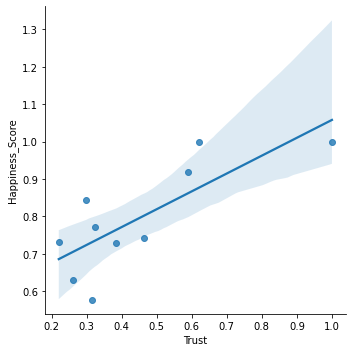

In [90]:
dataframe2 = pd.pivot_table(data_2015, index = "Region", values = ["Happiness_Score", "Trust"])

# to normalize
dataframe2["Happiness_Score"] = dataframe2["Happiness_Score"]/max(dataframe2["Happiness_Score"])
dataframe2["Trust"] = dataframe2["Trust"]/max(dataframe2["Trust"])
sns.lmplot("Trust", "Happiness_Score", data = dataframe2)
plt.show()

* As the percentage of corruption decreases, we can say that happiness score also increases.

### Kde Plot

* visualization with the score of happiness according to years and the value of freedom affecting it.

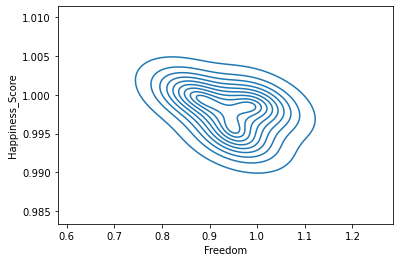

In [91]:
dataframe3 = pd.pivot_table(data_concat, index = 'Year', values = ["Happiness_Score", "Freedom"])

# to normalize
dataframe3["Happiness_Score"] = dataframe3["Happiness_Score"]/max(dataframe3["Happiness_Score"])
dataframe3["Freedom"] = dataframe3["Freedom"]/max(dataframe3["Freedom"])
sns.kdeplot(dataframe3.Freedom, dataframe3.Happiness_Score, shade = False, cut = 5)
plt.show()

### Violin Plot

* The violin plot deos not look at the correlation between the two features. it looks at the distribution of the values within the features.

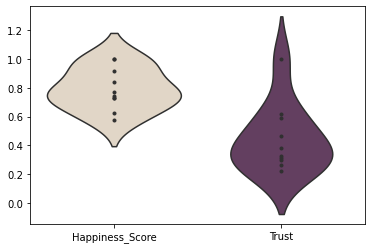

In [94]:
pal = sns.cubehelix_palette(2, rot = .5, dark = .3)
sns.violinplot(data = dataframe2, palette = pal, inner = "points")
plt.show()

### Heatmap

* We can visualize the correlation between HeatMap and the features in our datasheet.

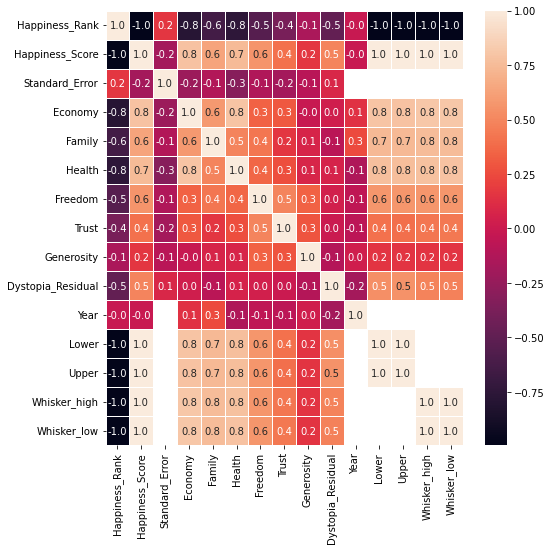

In [95]:
f, ax = plt.subplots(figsize = (8, 8))
sns.heatmap(data_concat.corr(), annot = True, linewidth = .5, fmt = '.1f', ax = ax)
plt.show()

### Box Plot

* We can see the percentage of happiness score according to years by box plot.

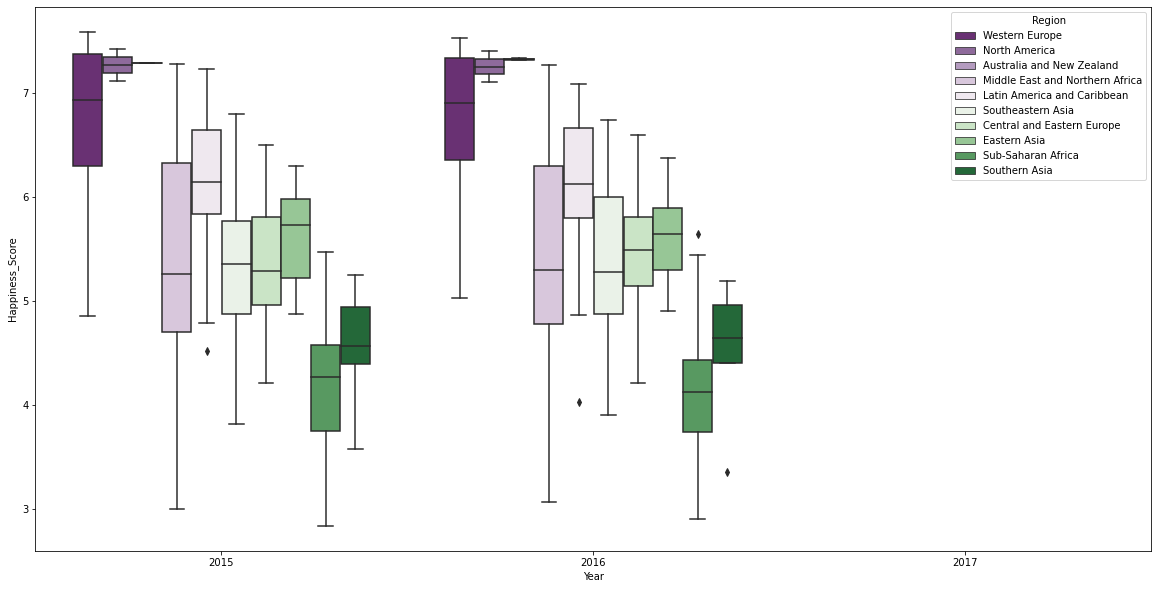

In [96]:
f, ax = plt.subplots(figsize = (20, 10))
sns.boxplot(x = "Year", y = "Happiness_Score", hue = "Region", data = data_concat, palette = "PRGn", ax = ax)
plt.show()

* The year 2017 seems to be empty because in our 2017 year, the regions are numbered insted of region names.